In [2]:
from utils import data_utils
import torch
import matplotlib.pyplot as plt

In [3]:
train_data, test_data = data_utils.get_data()

In [4]:
image, label = train_data[0]
print(image.shape, label)
len(train_data), len(test_data)
class_names = train_data.classes
print(class_names)

torch.Size([1, 28, 28]) 9
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 1.0, 'Ankle boot')

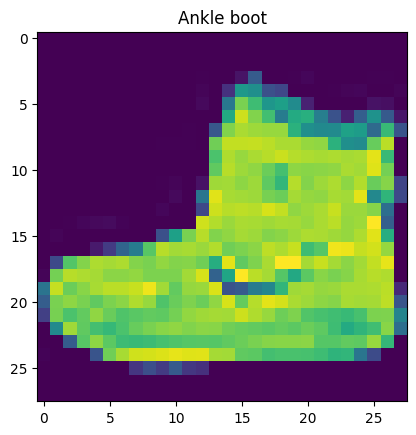

In [5]:
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

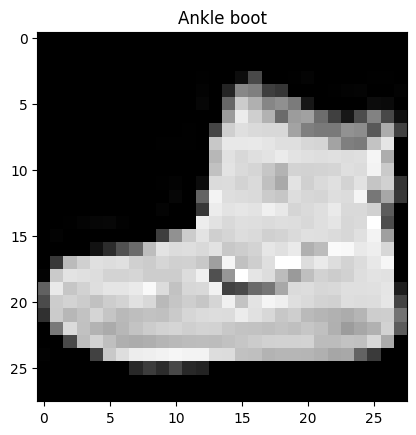

In [6]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

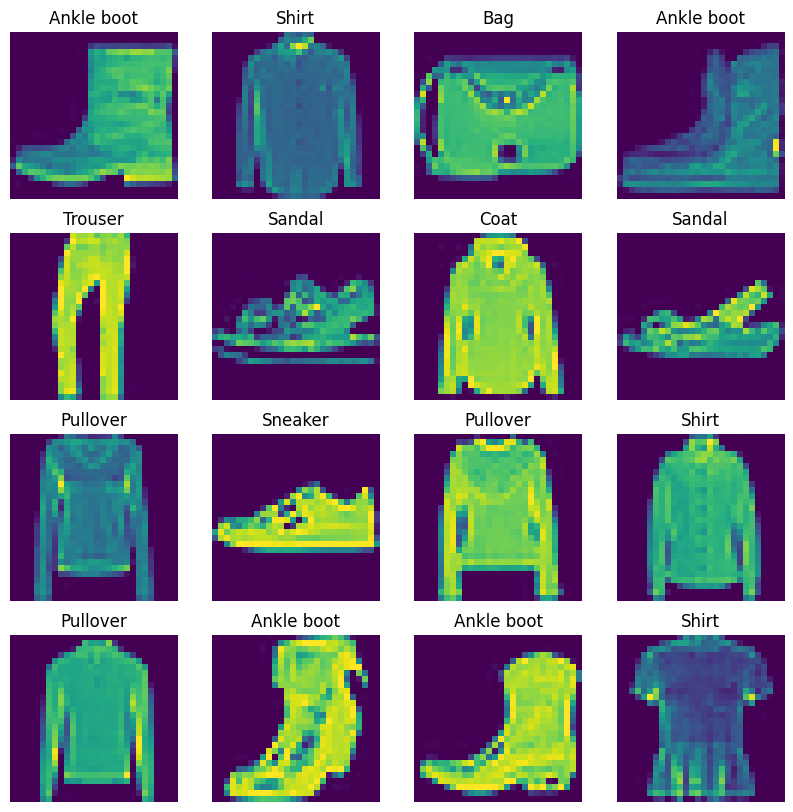

In [7]:
torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
column, row = 4, 4

for i in range(1, column * row + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(row, column, i)
    plt.imshow(image.squeeze())
    plt.title(class_names[label])
    plt.axis('off')

In [8]:
from torch.utils.data import DataLoader
from configs.config_settings import config
train_dataloader = DataLoader(train_data, batch_size=config['batch_size'], shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=config['batch_size'], shuffle=False)

print(f"Dataloaders: {train_dataloader}, {test_dataloader}")
print(f"Lenght of train dataloader: {len(train_dataloader)}, {len(test_dataloader)}")
print(train_dataloader.dataset.classes)

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x000001C647AEC3D0>, <torch.utils.data.dataloader.DataLoader object at 0x000001C647AEC310>
Lenght of train dataloader: 1875, 313
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
#Lấy 1 batch đầu tiên để kiểm tra
images, labels = next(iter(train_dataloader))
print(images.shape, labels.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [10]:
import requests
from pathlib import Path

if Path("help_function.py").is_file():
    print("help_function.py already exists")
else:
    print("Downloading help_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("help_function.py", "wb") as file:
        file.write(request.content)

In [28]:
print(test_dataloader.dataset)
print(dir(test_dataloader))
print(dir(test_dataloader.dataset))
print(test_dataloader.batch_size)
print(len(test_dataloader))
print(len(test_dataloader.dataset))
for X, y in test_dataloader:
    print(X.shape, y.shape)
    break

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data/processed
    Split: Test
    StandardTransform
Transform: ToTensor()
['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_index_sampler', '_is_protocol', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'in_order', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin

In [ ]:
from utils import evaluate_utils
from models.model import FashionMNISTModelV0
from configs.config_settings import config
import checkpoints
import torch
import torch.nn as nn
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=len(train_dataloader.dataset.classes)).to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.CrossEntropyLoss()
loaded_model_0 = FashionMNISTModelV0(input_shape=config['input_shape'], hidden_units=config['hidden_units'], output_shape=config['output_shape'])
loaded_model_0.load_state_dict(torch.load(checkpoints/model.pth))
print(evaluate_utils.evaluate_model(loaded_model_0, test_dataloader, loss_fn, accuracy_fn=accuracy_fn))

NameError: name 'device' is not defined